
Starting training loop...


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

[INFO] Train Loss: 1.1058, MAE: 0.7345
[INFO] Val Loss: 1.0060, MAE: 0.7889


Epochs:  20%|██        | 1/5 [00:01<00:07,  1.76s/it]

[INFO] Train Loss: 1.0641, MAE: 0.6954
[INFO] Val Loss: 0.9906, MAE: 0.7730
[INFO] Early stopping triggered.


Epochs:  20%|██        | 1/5 [00:03<00:14,  3.67s/it]


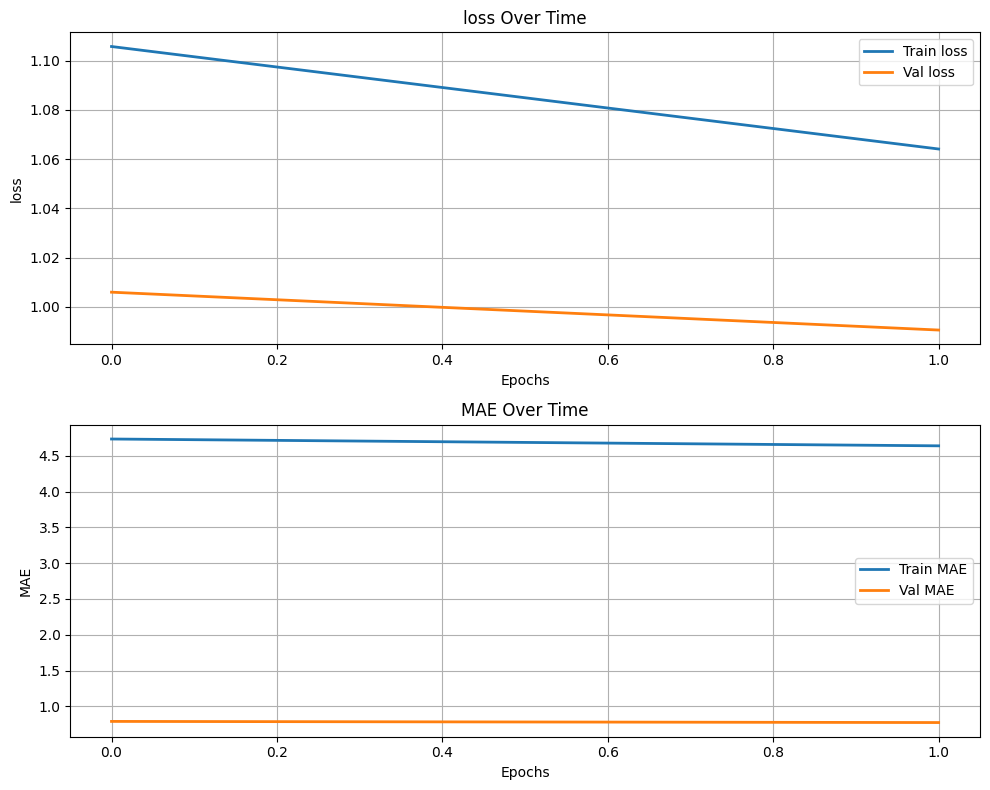

[INFO] Training history plot saved to ./training_history


<Figure size 640x480 with 0 Axes>

In [1]:
import os
os.chdir("../..")  # Change to project root directory
from packages.models.Autoencoder import Conv3DAutoencoder
from packages.train.training import train_model
from packages.io.input_loader import get_data_loaders
import torch
import os
from packages.data_objects.dataset import Dataset
from dotenv import load_dotenv
model = Conv3DAutoencoder(in_channels=50, embedding_dim=256)
load_dotenv()
dataset_path = "/home/lolly/Desktop/test/patient1"
# Dummy training loop
optimizer = torch.optim.AdamW
criterion = torch.nn.MSELoss
mae = torch.nn.L1Loss

config = {
    'batch_size': 32,
    'lr': 1e-3,
    'epochs': 5,
    'backup_interval': 10,
    'EarlyStopping' : {'patience': 1, 'min_delta': 0.1},
    #'BackupManager': {'backup_interval': 10, 'backup_path': './model_backups'},
    'ReduceLROnPlateau': {'mode': 'min', 'patience': 1, 'factor': 0.1},
    'history_plot': {'plot_type': 'extended', 'save_path': './training_history'}
}

metrics = {'MAE': mae}

dataset = Dataset.get_test_dataset(root_folder=dataset_path, unpack_func='dict',nsamples=20)

train_loader, val_loader, _ = get_data_loaders(dataset, sets_size={'train': 0.7, 'val': 0.3, 'test': 0})

print("\nStarting training loop...")
model.train()
train_model(model, train_loader=train_loader, val_loader=val_loader, loss_criterion=criterion, optimizer=optimizer, config=config, metrics=metrics)

data_loader_test.py	      model_testing.py	    test_output
debug_constants.py	      __pycache__	    train_loop.py
__init__.py		      test1.py
localtest_cloud_script.ipynb  test_data_objects.py
